In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import mlab
from commpy.utilities  import upsample
from optic.models.amplification import get_spectrum
from optic.dsp.core import firFilter, pulseShape
import scipy.signal as signal

# Spectrual plotting Library comparisons

## Real signal

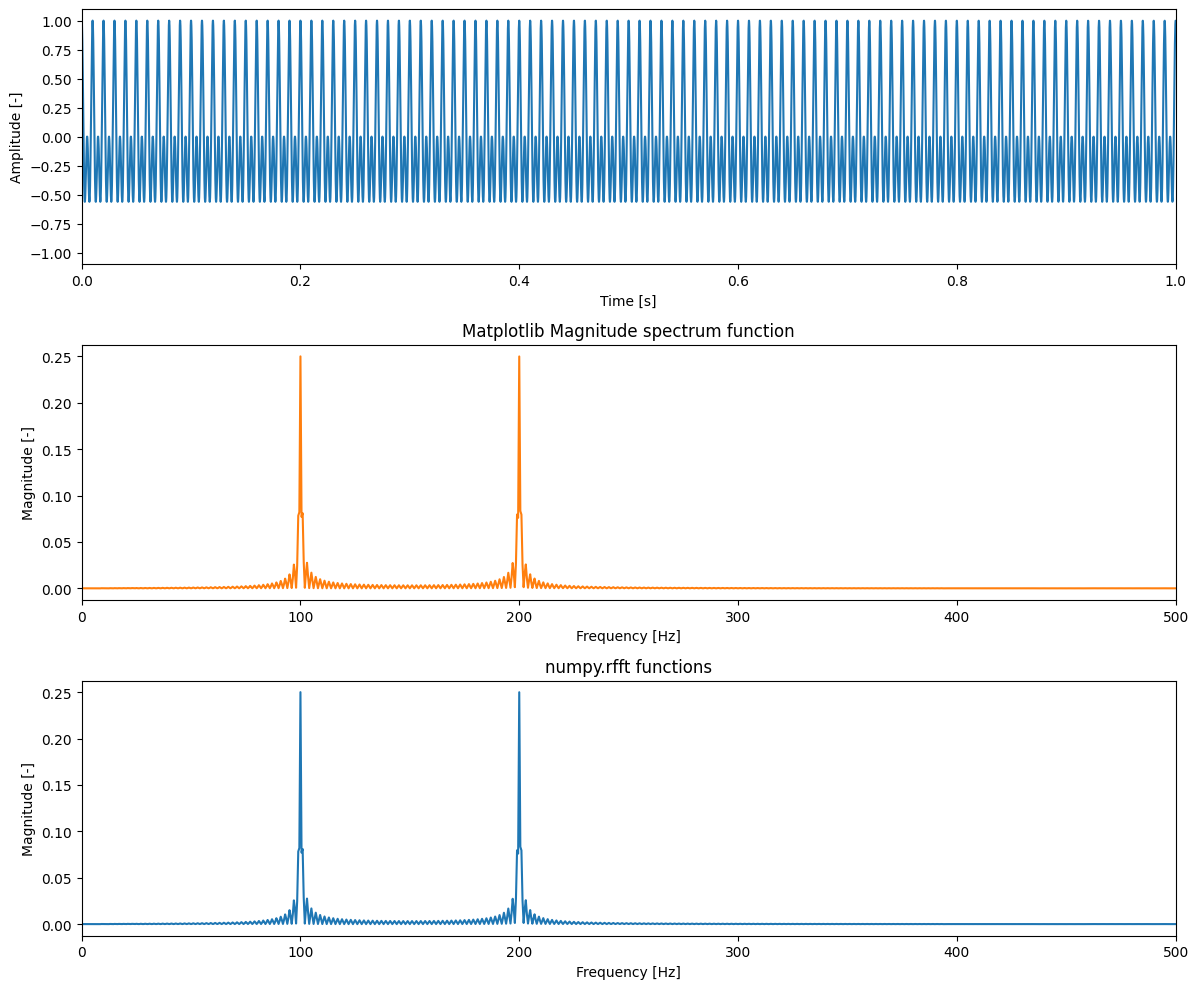

In [47]:
sr = 10000  # samplerate in samp/s
freq1 = 200
freq2 = 100
duration = 2  # in seconds

x = np.linspace(0, duration, sr * duration)
firstsig = 0.5*np.cos(freq1 * 2 * np.pi * x[:10000]) + 0.5*np.cos(freq2 * 2 * np.pi * x[:10000])
secondsig = np.cos(freq1 * 2 * np.pi * x[10000:15000])
thirdsig = np.cos(freq2 * 2 * np.pi * x[15000:20000])
y = np.concatenate([firstsig, secondsig, thirdsig])

fig, ax = plt.subplots(3, 1, figsize=(12, 10))

ax[0].plot(x, y)
ax[0].axis(xmin=0, xmax=1)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude [-]')

ax[1].magnitude_spectrum(y, Fs=sr, color='C1', window=mlab.window_none)
ax[1].axis(xmin=0, xmax=500)
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Magnitude [-]')
ax[1].set_title('Matplotlib Magnitude spectrum function')

ax[2].plot(np.fft.rfftfreq(sr*duration, d=1/sr), np.abs(np.fft.rfft(y))/(sr*duration))
ax[2].axis(xmin=0, xmax=500)
ax[2].set_xlabel('Frequency [Hz]')
ax[2].set_ylabel('Magnitude [-]')
ax[2].set_title('numpy.rfft functions')

plt.tight_layout()
plt.show()

1024
0.49993041949028744


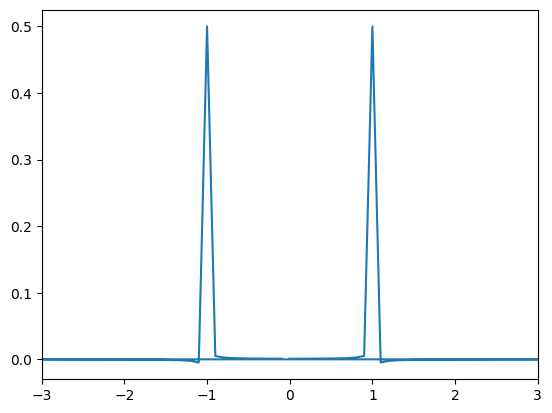

In [76]:
tarray = np.linspace(0,10,2**10)
funct1 = np.cos(2*np.pi*1*tarray)
plt.plot(np.fft.fftfreq(len(tarray),d=tarray[-1]/len(tarray)),np.fft.fft(funct1)/len(tarray))
plt.xlim(-3,3)
print(len(tarray))
print(np.max(np.real(np.fft.fft(funct1))/len(tarray)))

## Complex signal

firstsig len: 5000 | secondsig len: 10000 | thirdsig len: 5000


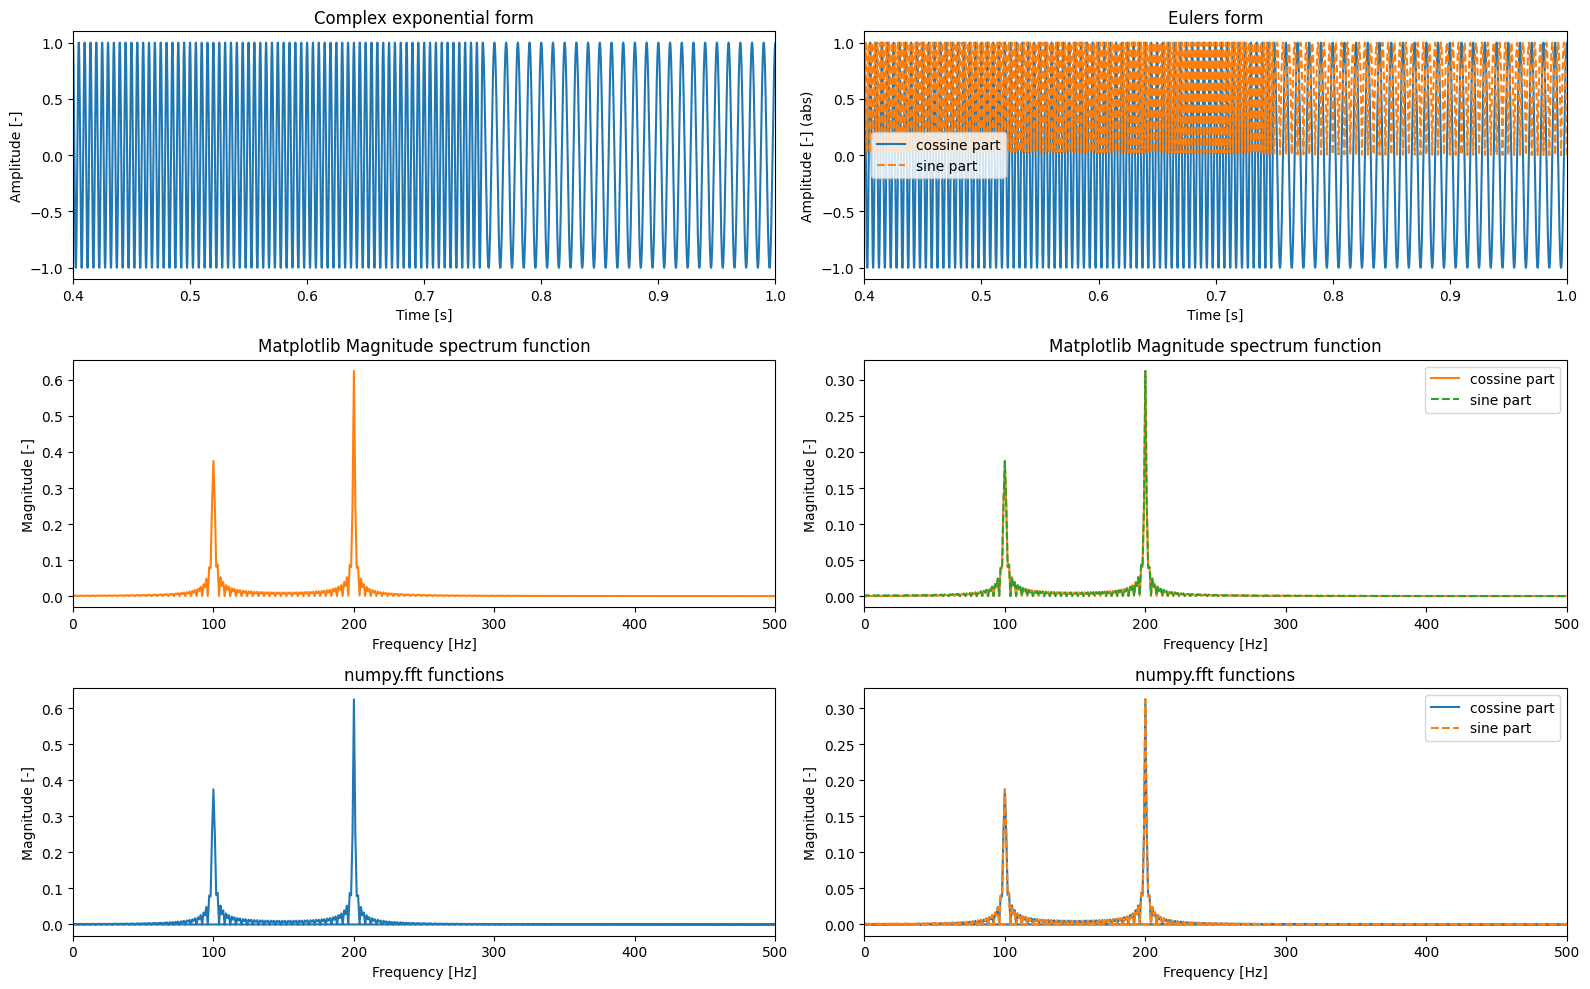

In [77]:
sr = 20000  # samplerate in samp/s
freq1 = 200
freq2 = 100
duration = 1  # in seconds

x = np.linspace(0, duration, sr * duration)
firstsig = 0.5*np.exp(2*np.pi*1j*freq1*x[:int(sr/4)]) + 0.5*np.exp(2*np.pi*1j*freq2*x[:int(sr/4)])
secondsig = np.exp(2*np.pi*1j*freq1*x[int(sr/4):int(3*sr/4)])
thirdsig = np.exp(2*np.pi*1j*freq2*x[int(3*sr/4):int(sr)])

print(f'firstsig len: {len(firstsig)} | secondsig len: {len(secondsig)} | thirdsig len: {len(thirdsig)}')

y = np.concatenate([firstsig, secondsig, thirdsig])

firstsigc = 0.5*np.cos(2*np.pi*freq1*x[:int(sr/4)]) + 0.5*np.cos(2*np.pi*freq2*x[:int(sr/4)])
secondsigc = np.cos(2*np.pi*freq1*x[int(sr/4):int(3*sr/4)])
thirdsigc = np.cos(2*np.pi*freq2*x[int(3*sr/4):int(sr)])

firstsigs = 0.5*1j*np.sin(2*np.pi*freq1*x[:int(sr/4)]) + 0.5*1j*np.sin(2*np.pi*freq2*x[:int(sr/4)])
secondsigs = 1j*np.sin(2*np.pi*freq1*x[int(sr/4):int(3*sr/4)])
thirdsigs = 1j*np.sin(2*np.pi*freq2*x[int(3*sr/4):int(sr)])

y2c = np.concatenate([firstsigc, secondsigc, thirdsigc])
y2s = np.concatenate([firstsigs, secondsigs, thirdsigs])

fig, ax = plt.subplots(3, 2, figsize=(16, 10))

ax[0][0].plot(x, y)
ax[0][0].axis(xmin=0.4, xmax=1)
ax[0][0].set_xlabel('Time [s]')
ax[0][0].set_ylabel('Amplitude [-]')
ax[0][0].set_title('Complex exponential form')

spectrum, freq = mlab.magnitude_spectrum(y, Fs=sr, window=mlab.window_none,sides='onesided')
ax[1][0].plot(freq,spectrum, color='C1')
# ax[1][0].magnitude_spectrum(y, Fs=sr, color='C1', window=mlab.window_none)
ax[1][0].axis(xmin=0, xmax=500)
ax[1][0].set_xlabel('Frequency [Hz]')
ax[1][0].set_ylabel('Magnitude [-]')
ax[1][0].set_title('Matplotlib Magnitude spectrum function')

spectrum = np.abs(np.fft.fft(y))/(sr*duration)
freq = np.fft.fftfreq(len(y), d=1/sr)
ax[2][0].plot(freq,spectrum)
ax[2][0].axis(xmin=0, xmax=500)
ax[2][0].set_xlabel('Frequency [Hz]')
ax[2][0].set_ylabel('Magnitude [-]')
ax[2][0].set_title('numpy.fft functions')

ax[0][1].plot(x, y2c, label='cossine part')
ax[0][1].plot(x, np.abs(y2s), label='sine part', linestyle='--')
ax[0][1].axis(xmin=0.4, xmax=1)
ax[0][1].set_xlabel('Time [s]')
ax[0][1].set_ylabel('Amplitude [-] (abs)')
ax[0][1].set_title('Eulers form')
ax[0][1].legend()

ax[1][1].magnitude_spectrum(y2c, Fs=sr, color='C1', window=mlab.window_none, label='cossine part')
ax[1][1].magnitude_spectrum(y2s, Fs=sr, color='C2', window=mlab.window_none, label='sine part', linestyle='--')
ax[1][1].axis(xmin=0, xmax=500)
ax[1][1].set_xlabel('Frequency [Hz]')
ax[1][1].set_ylabel('Magnitude [-]')
ax[1][1].set_title('Matplotlib Magnitude spectrum function')
ax[1][1].legend()

ax[2][1].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y2c))/(sr*duration), label='cossine part')
ax[2][1].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y2s))/(sr*duration), label='sine part', linestyle='--')
ax[2][1].axis(xmin=0, xmax=500)
ax[2][1].set_xlabel('Frequency [Hz]')
ax[2][1].set_ylabel('Magnitude [-]')
ax[2][1].set_title('numpy.fft functions')
ax[2][1].legend()

plt.tight_layout()
plt.show()

### Clean complex signal (in get_spectrum)

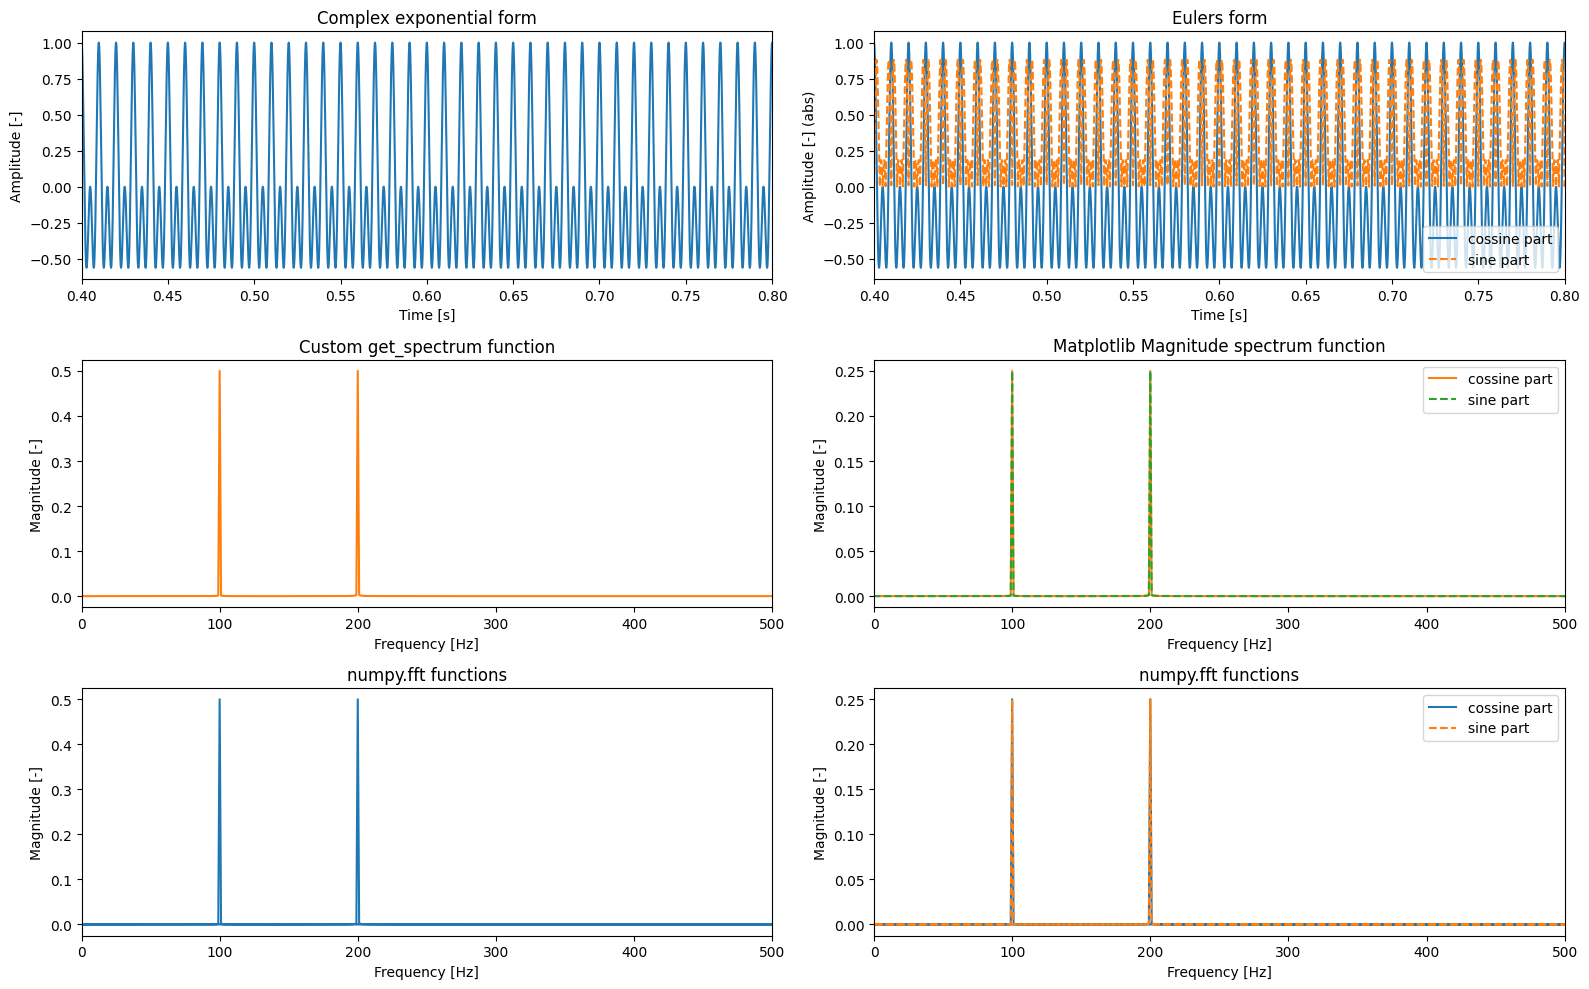

In [41]:
sr = 40000  # samplerate in samp/s
freq1 = 200
freq2 = 100
duration = 1  # in seconds

x = np.linspace(0, duration, sr * duration)
y = 0.5*np.exp(2*np.pi*1j*freq1*x) + 0.5*np.exp(2*np.pi*1j*freq2*x)
y2c = 0.5*np.cos(2*np.pi*freq1*x) + 0.5*np.cos(2*np.pi*freq2*x)
y2s = 0.5*1j*np.sin(2*np.pi*freq1*x) + 0.5*1j*np.sin(2*np.pi*freq2*x)

fig, ax = plt.subplots(3, 2, figsize=(16, 10))

ax[0][0].plot(x, y)
ax[0][0].axis(xmin=0.4, xmax=0.8)
ax[0][0].set_xlabel('Time [s]')
ax[0][0].set_ylabel('Amplitude [-]')
ax[0][0].set_title('Complex exponential form')

spectrum, freq = mlab.magnitude_spectrum(y, Fs=sr, window=mlab.window_none, sides='onesided')

ax[1][0].plot(freq, spectrum, color='C1')
ax[1][0].axis(xmin=0, xmax=500)
ax[1][0].set_xlabel('Frequency [Hz]')
ax[1][0].set_ylabel('Magnitude [-]')
ax[1][0].set_title('Custom get_spectrum function')

ax[2][0].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y))/(sr*duration))
ax[2][0].axis(xmin=0, xmax=500)
ax[2][0].set_xlabel('Frequency [Hz]')
ax[2][0].set_ylabel('Magnitude [-]')
ax[2][0].set_title('numpy.fft functions')

ax[0][1].plot(x, y2c, label='cossine part')
ax[0][1].plot(x, np.abs(y2s), label='sine part', linestyle='--')
ax[0][1].axis(xmin=0.4, xmax=0.8)
ax[0][1].set_xlabel('Time [s]')
ax[0][1].set_ylabel('Amplitude [-] (abs)')
ax[0][1].set_title('Eulers form')
ax[0][1].legend()

ax[1][1].magnitude_spectrum(y2c, Fs=sr, color='C1', window=mlab.window_none, label='cossine part')
ax[1][1].magnitude_spectrum(y2s, Fs=sr, color='C2', window=mlab.window_none, label='sine part', linestyle='--')
ax[1][1].axis(xmin=0, xmax=500)
ax[1][1].set_xlabel('Frequency [Hz]')
ax[1][1].set_ylabel('Magnitude [-]')
ax[1][1].set_title('Matplotlib Magnitude spectrum function')
ax[1][1].legend()

ax[2][1].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y2c))/(sr*duration), label='cossine part')
ax[2][1].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y2s))/(sr*duration), label='sine part', linestyle='--')
ax[2][1].axis(xmin=0, xmax=500)
ax[2][1].set_xlabel('Frequency [Hz]')
ax[2][1].set_ylabel('Magnitude [-]')
ax[2][1].set_title('numpy.fft functions')
ax[2][1].legend()

plt.tight_layout()
plt.show()

# Demodulation

In [3]:
BitPeriod = 1/330e6  # secondsd
samplesPbit = 256
Fs = samplesPbit/BitPeriod

bitsequence = np.random.randint(0,2,50)

symbolsUp = upsample(bitsequence, samplesPbit)
pulse = pulseShape('nrz', samplesPbit)
pulse = pulse/max(abs(pulse))

print(f'Sampling Frequency: {Fs*1e-9} (GHz)')

Sampling Frequency: 84.48 (GHz)


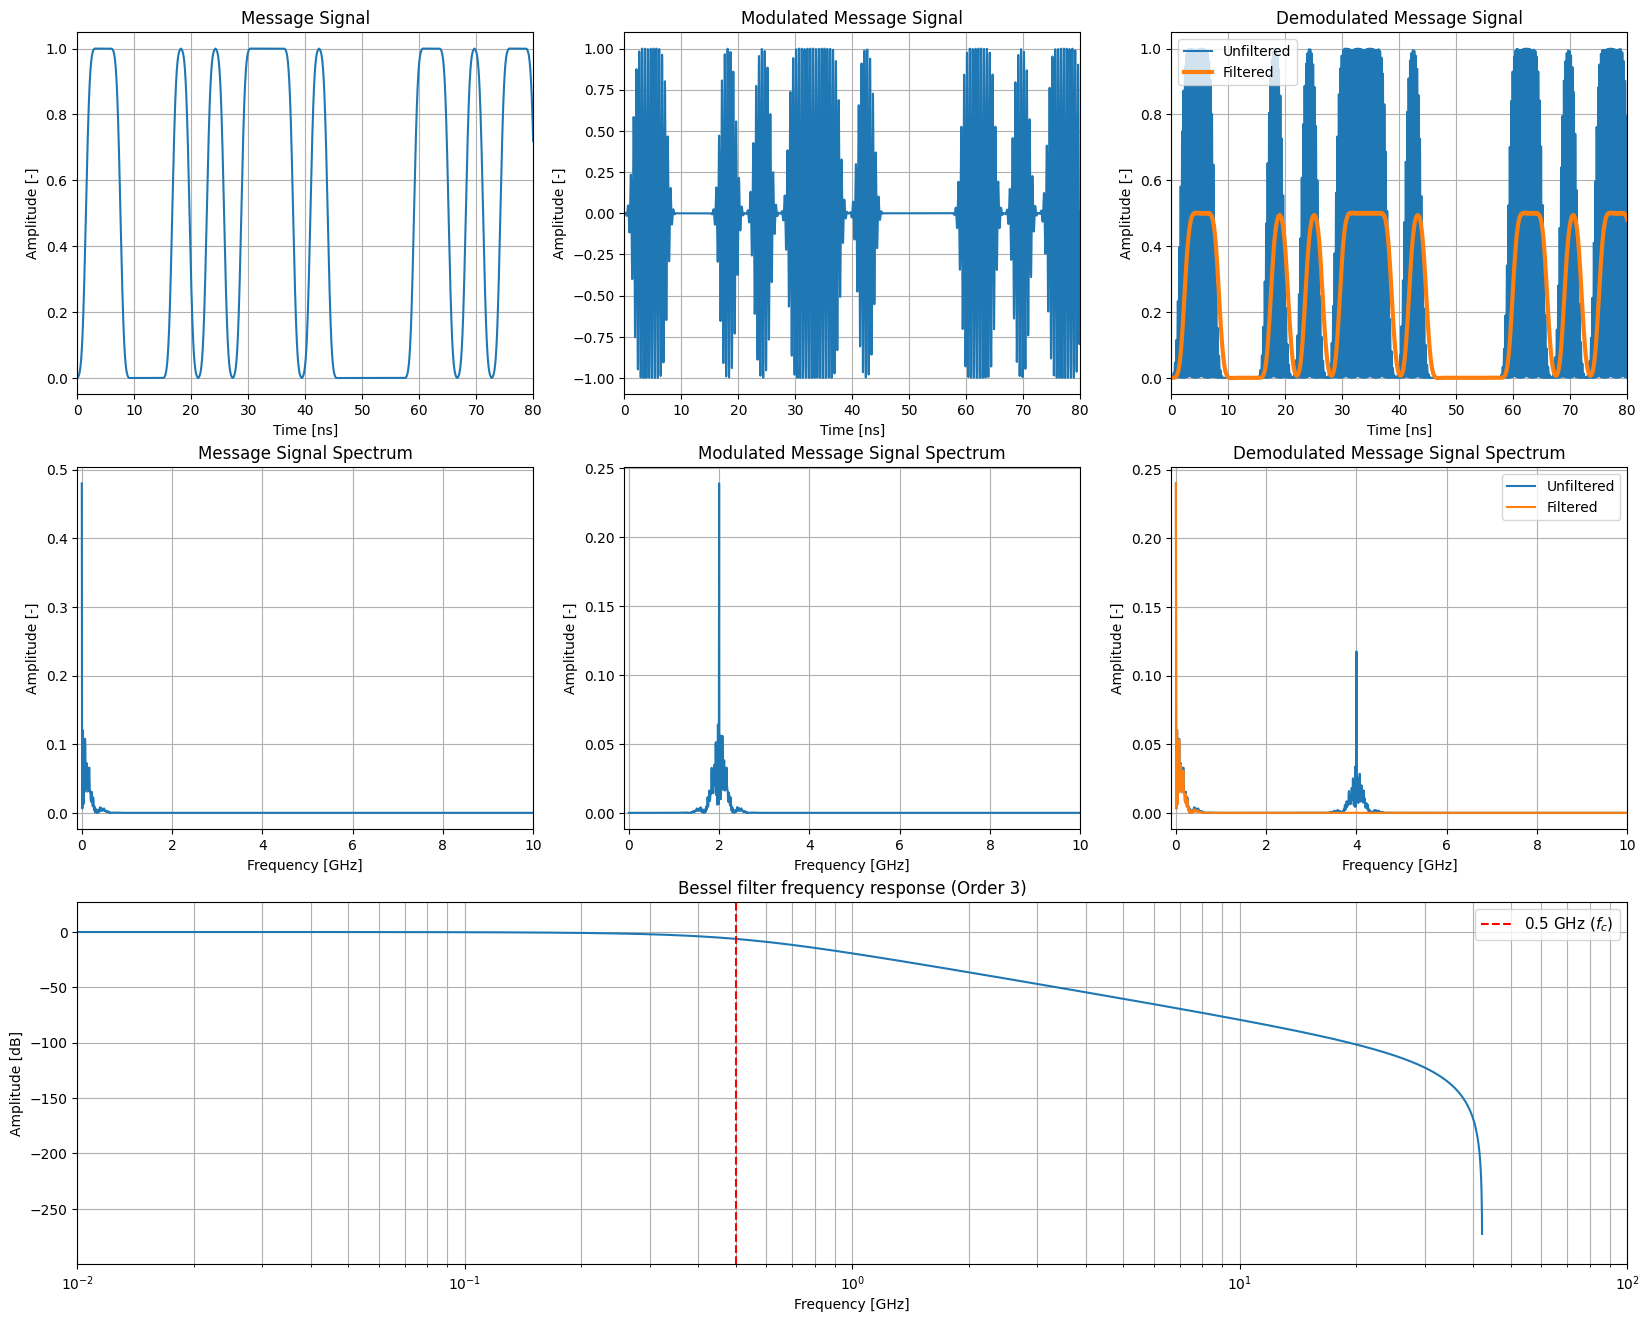

In [7]:
tarray = np.linspace(0,BitPeriod*len(bitsequence),samplesPbit*len(bitsequence))

sigMes = firFilter(pulse, symbolsUp)  # Message Signal

fig, ax = plt.subplots(3, 3, figsize=(20, 16))

ax[0][0].plot(tarray*1e9, sigMes)
ax[0][0].axis(xmin=0, xmax=80)
ax[0][0].grid()
ax[0][0].set_xlabel('Time [ns]')
ax[0][0].set_ylabel('Amplitude [-]')
ax[0][0].set_title('Message Signal')

freqMod = 2e9  # Hz
carrier = np.sin(2*np.pi*freqMod*tarray)
sigMod = sigMes*carrier

ax[0][1].plot(tarray*1e9, sigMod)
ax[0][1].axis(xmin=0, xmax=80)
ax[0][1].grid()
ax[0][1].set_xlabel('Time [ns]')
ax[0][1].set_ylabel('Amplitude [-]')
ax[0][1].set_title('Modulated Message Signal')

# Demodulation Filtering ----------------------------------------------     

DemodCutFreq = 0.5e9  # Hz 
Demodorder = 3

sigDemod = sigMod * np.sin(2*np.pi*freqMod*tarray)

w_norm = DemodCutFreq / (Fs/2)
b,a = signal.bessel(N=Demodorder, Wn=w_norm, btype='low', norm='phase')
w, h = signal.freqz(b, a, worN=1024, fs=Fs)
FilteredDemod = signal.lfilter(b, a, sigDemod)

ax[2, 0].axis('off') 
ax[2, 1].axis('off')  
ax[2, 2].axis('off') 

ax_full = fig.add_subplot(3, 1, 3)  
ax_full.set_title("Imagem ocupando a linha toda")

ax_full.plot(w*1e-9, 20 * np.log10(abs(h)))
ax_full.axvline(DemodCutFreq*1e-9, color='red', linestyle='--', label=f'{DemodCutFreq*1e-9} GHz ($f_c$)')
ax_full.set_xscale('log')
ax_full.set_xlim(0.01,100)
ax_full.set_title(f'Bessel filter frequency response (Order {Demodorder})')
ax_full.set_xlabel('Frequency [GHz]')
ax_full.set_ylabel('Amplitude [dB]')
ax_full.margins(0, 0.1)
ax_full.grid(which='both', axis='both')
ax_full.legend(fontsize=11)

ax[0][2].plot(tarray*1e9, sigDemod, label='Unfiltered')
ax[0][2].plot(tarray*1e9, FilteredDemod, label='Filtered', linewidth=3)
ax[0][2].axis(xmin=0, xmax=80)
ax[0][2].grid()
ax[0][2].set_xlabel('Time [ns]')
ax[0][2].set_ylabel('Amplitude [-]')
ax[0][2].set_title('Demodulated Message Signal')
ax[0][2].legend()


# Spectrum plots ---------------------------------------------------

spectrum, freq = mlab.magnitude_spectrum(sigMes, Fs=Fs, window=mlab.window_none, sides='onesided')

ax[1][0].plot(freq*1e-9, spectrum)
ax[1][0].axis(xmin=-0.1, xmax=10)
ax[1][0].grid()
ax[1][0].set_xlabel('Frequency [GHz]')
ax[1][0].set_ylabel('Amplitude [-]')
ax[1][0].set_title('Message Signal Spectrum')

spectrum, freq = mlab.magnitude_spectrum(sigMod, Fs=Fs, window=mlab.window_none, sides='onesided')

ax[1][1].plot(freq*1e-9, spectrum)
ax[1][1].axis(xmin=-0.1, xmax=10)
ax[1][1].grid()
ax[1][1].set_xlabel('Frequency [GHz]')
ax[1][1].set_ylabel('Amplitude [-]')
ax[1][1].set_title('Modulated Message Signal Spectrum')

spectrum, freq = mlab.magnitude_spectrum(sigDemod, Fs=Fs, window=mlab.window_none, sides='onesided')
spectrum2, freq2 = mlab.magnitude_spectrum(FilteredDemod, Fs=Fs, window=mlab.window_none, sides='onesided')

ax[1][2].plot(freq*1e-9, spectrum, label='Unfiltered')
ax[1][2].plot(freq2*1e-9, spectrum2, label='Filtered')
ax[1][2].axis(xmin=-0.1, xmax=10)
ax[1][2].grid()
ax[1][2].set_xlabel('Frequency [GHz]')
ax[1][2].set_ylabel('Amplitude [-]')
ax[1][2].set_title('Demodulated Message Signal Spectrum')
ax[1][2].legend()